In [1]:
#April 19, 2020
#Load the dataset, when working with TensorFlow it is good to specify data types
import numpy as np
from sklearn.datasets import load_iris 
iris = load_iris() 
X = iris.data.astype(np.float32) 
y_true = iris.target.astype(np.int32)

In [2]:
#Outputs a single array of categorical values, Neural Networks usually have n_outputs with n as number of classes, use onehot-encoding to convert categorical y to one-hot encoded y_onehot
from sklearn.preprocessing import OneHotEncoder

y_onehot = OneHotEncoder().fit_transform(y_true.reshape(-1, 1))
y_onehot = y_onehot.astype(np.int64).todense()

C:\Users\JRuiz\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [3]:
#Define the data type of onehot-encoded y
y_onehot.dtype

dtype('int64')

In [4]:
#Creates matrix of 5 values for data sets
y_onehot[:5]

matrix([[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0]], dtype=int64)

In [5]:
#Split into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, random_state=14)

In [6]:
#Build the network by creating different layers
#Data set contains four input variables and three output classes (first and third layers), create small network to test second value
input_layer_size, hidden_layer_size, output_layer_size = 4, 6, 3

In [8]:
#Create the hidden layer and output layer, the input layer is implicit, we use Dense layers here
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [9]:
#Create the hidden layer after importing values above, use relu for hidden, and sigmoid for output
hidden_layer = Dense(units=hidden_layer_size, input_dim=input_layer_size, activation='relu')
output_layer = Dense(output_layer_size, activation='sigmoid')

In [10]:
#!pip install -U keras

In [11]:
#Combine layers into sequential model, compile the network, create the graph
#Given information on how the network is trained and evaluated
#Values define what the neural network tries to train to reduce, the mean squared error between the output neurons and expected values
#Depends on choice of optimizer, trade off between speed and memory usage
model = Sequential(layers=[hidden_layer, output_layer])
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [12]:
#Train our model using the fit() function
#Keras models return a history object from fit(), let us see the data at fine-grained level
history = model.fit(X_train, y_train)

Train on 112 samples
112/112 [==============================] - ETA: 21s - loss: 0.6191 - accuracy: 0.0156     - 29s 256ms/sample - loss: 0.5554 - accuracy: 0.0179


In [13]:
#Neural Network trains 10 epochs, or training cycles that take the trianing data, run through the neural networkk, by updating the weights and evaluating results
#Investigate history object, to see loss function's score after each epoch, lower is better here
#Also shows accuracy where higher is better, but slight improvement
history.history

{'loss': [0.5554126926830837], 'accuracy': [0.017857144]}

In [14]:
#Plot out the history object using matplotlib
%matplotlib inline

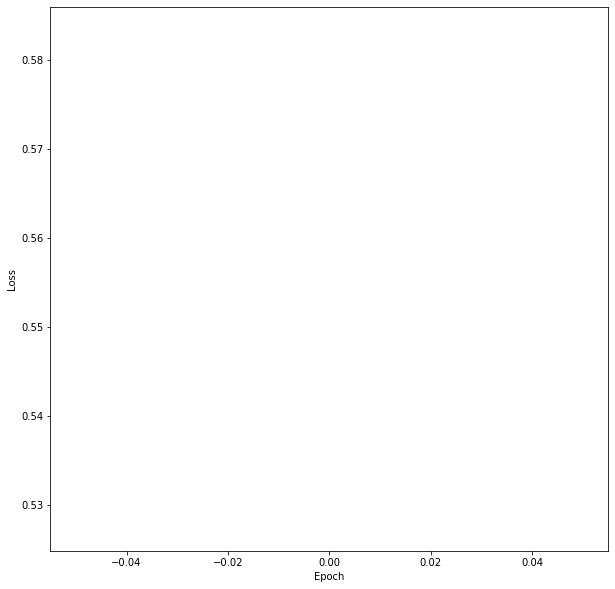

In [15]:
#Plots the object fully
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 10))
plt.plot(history.epoch, history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig("keras_on_iris_one.png")

In [16]:
#Predict the test test
y_pred = model.predict(X_test)

In [17]:
#Predict the model with classes
y_pred = model.predict_classes(X_test)

In [18]:
#Display array of values
y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [19]:
#Training loss slightly decreases, neural networks train slowly
#Fit function performs 10 epocs, predict test set and run classification report
from sklearn.metrics import classification_report
y_pred = model.predict_classes(X_test)
print(classification_report(y_true=y_test.argmax(axis=1), y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.09      0.12      0.10        17
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00         8

    accuracy                           0.05        38
   macro avg       0.03      0.04      0.03        38
weighted avg       0.04      0.05      0.04        38



C:\Users\JRuiz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
#Run the process again with layers and sequential model
hidden_layer = Dense(units=hidden_layer_size, input_dim=input_layer_size, activation='relu')
output_layer = Dense(output_layer_size, activation='sigmoid')

model = Sequential(layers=[hidden_layer, output_layer])
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [21]:
#Train for 1000 epochs
history = model.fit(X_train, y_train, nb_epoch=1000, verbose=False)

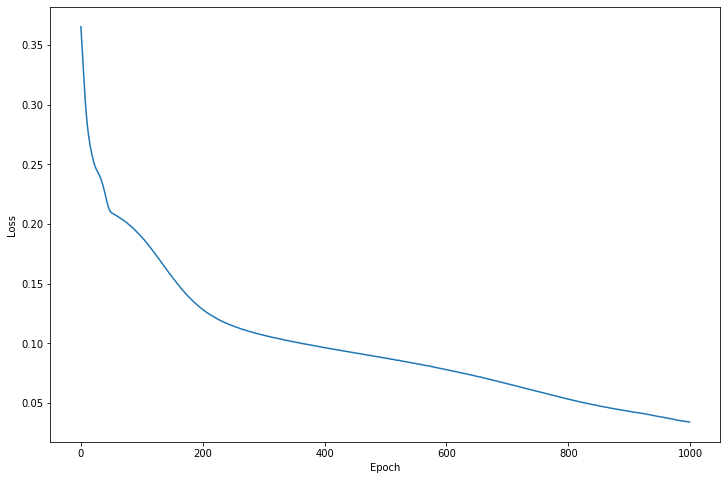

In [22]:
#Visualize the loss per epoch, run the graph again
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(history.epoch, history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig("keras_on_iris_2.png")

In [23]:
#Perform classification report again
y_pred = model.predict_classes(X_test)
print(classification_report(y_true=y_test.argmax(axis=1), y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

